In [1]:
# 1. 🧩 Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_excel(r"C:\Users\SAI29\Downloads\mobile_app_user_dataset_1.xlsx", engine='openpyxl')
df.head()

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
0,Unique ID for each participant,StartDate,EndDate,"0=incomplete response, 1=complete response, 2=...","1=ours, 2=panel",Browser Meta Info-Browser,Browser Meta Info-Version,Browser Meta Info-Operating System,Browser Meta Info-Screen Resolution,Browser Meta Info-Flash Version,...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,6,3,7,2,6,3,4,3,4,4
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4,4,5,2,3,3,5,3,5,3
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,4,3,6,3,5,5,5,2,5,3


In [5]:
# 3. 🧼 Data Cleaning
print(df.info())
print(df.describe())

# Fill numeric missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Fill categorical (object type) missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10209 entries, 0 to 10208
Columns: 161 entries, ID to Q30_10
dtypes: object(161)
memory usage: 12.5+ MB
None
                                    ID            StartDate  \
count                            10209                10209   
unique                           10209                 9903   
top     Unique ID for each participant  2012-10-23 12:36:23   
freq                                 1                    3   

                    EndDate  Response Status  Participant Type Q1_1_TEXT  \
count                 10209            10209             10209     10040   
unique                 9961                7                 3         9   
top     2012-10-23 14:59:27                1                 2      MSIE   
freq                      3             4824              9818      4302   

        Q1_2_TEXT       Q1_3_TEXT Q1_4_TEXT     Q1_5_TEXT  ...  Q30_1 Q30_2  \
count       10036           10040     10040         10040  ...   

In [7]:
df.rename(columns={
    'Q16': 'Gender',
    'Q17': 'Age',          
    'Q27': 'Occupation',
    'Q19': 'Nationality',
    'Q20': 'Residence',
    'Q21': 'Language',
    'Q22': 'Consent_Level',
    'Q23': 'Education_Level',
    'Q25': 'Ownership_Belief',
    'Q18': 'Data_Control_Level',
    'Q30_1': 'Extraverted, enthusiastic',
    'Q30_2': 'Critical, quarrelsome',
    'Q30_3': 'Dependable, self-disciplined',
    'Q30_4': 'Anxious, easily upset',
    'Q30_5': 'Open to new experiences, complex',
    'Q30_6': 'Reserved, quiet',
    'Q30_7': 'Sympathetic, warm',
    'Q30_8': 'Disorganized, careless',
    'Q30_9': 'Calm, emotionally stable',
    'Q30_10': 'Conventional, uncreative'
}, inplace=True)

In [9]:
# 4. 🔄 Data Preprocessing
categorical_cols = ['Gender', 'Education_Level','Nationality', 'Occupation']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [11]:
df.rename(columns={'Q17': 'Age'}, inplace=True)

In [13]:
# Remove non-numeric characters (e.g., " years") and convert to int
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+)')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [15]:
# Create Age Group bins
df['Age_Group'] = pd.cut(df['Age'], bins=[10, 20, 30, 40, 50, 60, 100],
                         labels=["10s", "20s", "30s", "40s", "50s", "60+"])

In [17]:
df.rename(columns={
    'Q15_1': 'Navigation',
    'Q15_2': 'Business',
    'Q15_3': 'Catalogues',
    'Q15_4': 'Travel',
    'Q15_5': 'Books',
    'Q15_6': 'Photo_Video',
    'Q15_7': 'Lifestyle',
    'Q15_8': 'Entertainment',
    'Q15_9': 'Finance',
    'Q15_10': 'News',
    'Q15_11': 'Health_Fitness',
    'Q15_12': 'Games',
    'Q15_13': 'Food_Drink',
    'Q15_14': 'Education',
    'Q15_15': 'Medical',
    'Q15_16': 'Social_Networking',
    'Q15_17': 'Reference',
    'Q15_18': 'Sports',
    'Q15_19': 'Utilities',
    'Q15_20': 'Weather',
    'Q15_21': 'Productivity',
    'Q15_22': 'Music',
    'Q15_23': 'Other'
}, inplace=True)

In [19]:
print([col for col in df.columns if col in [
    'Navigation', 'Business', 'Catalogues', 'Travel', 'Books',
    'Photo_Video', 'Lifestyle', 'Entertainment', 'Finance', 'News',
    'Health_Fitness', 'Games', 'Food_Drink', 'Education', 'Medical',
    'Social_Networking', 'Reference', 'Sports', 'Utilities', 'Weather',
    'Productivity', 'Music', 'Other'
]])

['Navigation', 'Business', 'Catalogues', 'Travel', 'Books', 'Photo_Video', 'Lifestyle', 'Entertainment', 'Finance', 'News', 'Health_Fitness', 'Games', 'Food_Drink', 'Education', 'Medical', 'Social_Networking', 'Reference', 'Sports', 'Utilities', 'Weather', 'Productivity', 'Music', 'Other']


In [21]:
print(df[[
    'Navigation', 'Business', 'Catalogues', 'Travel', 'Books', 'Photo_Video', 'Lifestyle',
    'Entertainment', 'Finance', 'News', 'Health_Fitness', 'Games', 'Food_Drink', 'Education',
    'Medical', 'Social_Networking', 'Reference', 'Sports', 'Utilities', 'Weather',
    'Productivity', 'Music', 'Other']].head(10))

                                          Navigation  \
0  Which type of apps do you download? (please se...   
1                                                  1   
2                                                  1   
3                                                  1   
4                                                  1   
5                                                  1   
6                                                  1   
7                                                  1   
8                                                  1   
9                                                  1   

                                            Business  \
0  Which type of apps do you download? (please se...   
1                                                  1   
2                                                  1   
3                                                  1   
4                                                  1   
5                                              

In [23]:
# Step 1: Clean column names (optional but recommended)
df.columns = df.columns.str.strip().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")

# Step 2: Convert numeric-looking columns to proper numeric types
# This will convert any column that looks like a number to float/int
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Step 3: Force specific known numeric columns to be numeric (with coercion)
numeric_cols = [
    'Age', 'Education_Level', 'Consent_Level', 'Ownership_Belief'
    # Add more known numeric columns here if needed
]

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Step 4: Convert datetime columns if present
datetime_cols = ['StartDate', 'EndDate']
for col in datetime_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Step 5: Optional — check the new data types
print("\n✅ Updated Data Types:")
print(df.dtypes)


✅ Updated Data Types:
ID                                  object
StartDate                   datetime64[ns]
EndDate                     datetime64[ns]
Response_Status                     object
Participant_Type                    object
                                 ...      
Sympathetic,_warm                   object
Disorganized,_careless              object
Calm,_emotionally_stable            object
Conventional,_uncreative            object
Age_Group                           object
Length: 162, dtype: object


In [25]:
# Step 0: Replace the first row (if it's descriptions) with NaNs — keeps row count
if df.iloc[0].astype(str).str.contains("Which type of apps do you download").any():
    df.iloc[0] = np.nan

# Step 1: Convert app usage columns to numeric safely
app_columns = [
    'Navigation', 'Business', 'Catalogues', 'Travel', 'Books', 'Photo_Video', 'Lifestyle',
    'Entertainment', 'Finance', 'News', 'Health_Fitness', 'Games', 'Food_Drink', 'Education',
    'Medical', 'Social_Networking', 'Reference', 'Sports', 'Utilities', 'Weather',
    'Productivity', 'Music', 'Other'
]

# Step 2: Apply numeric conversion with coercion
df[app_columns] = df[app_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Fill missing values (including from step above) with column mean
df[app_columns] = df[app_columns].fillna(df[app_columns].mean())

# Step 4: Now apply the scaler
scaler = MinMaxScaler()
df[app_columns] = scaler.fit_transform(df[app_columns])


In [26]:
usage_cols = ['Navigation', 'Business', 'Catalogues', 'Travel', 'Books', 'Photo_Video', 'Lifestyle',
    'Entertainment', 'Finance', 'News', 'Health_Fitness', 'Games', 'Food_Drink', 'Education',
    'Medical', 'Social_Networking', 'Reference', 'Sports', 'Utilities', 'Weather',
    'Productivity', 'Music', 'Other']

In [29]:
# 5. 🧠 Feature Engineering
df['Total_App_Usage'] = df[usage_cols].sum(axis=1)
df['High_Risk_App_User'] = (df['Games'] + df['Social_Networking']) > 1.2
df['Engagement_Score'] = df['Total_App_Usage'] * (8 - df['Consent_Level'])
df['Control_Gap'] = abs(df['Data_Control_Level'] - df['Ownership_Belief'])
df['Is_Youth'] = df['Age'] < 30
df['Is_Student'] = df['Occupation'] == 'Student'

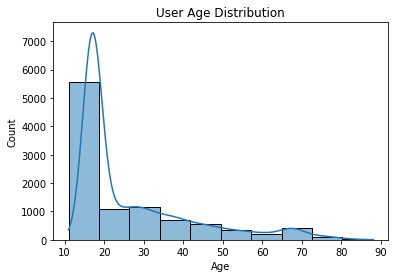

In [31]:
# 6. 📊 Exploratory Data Analysis

# Age distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

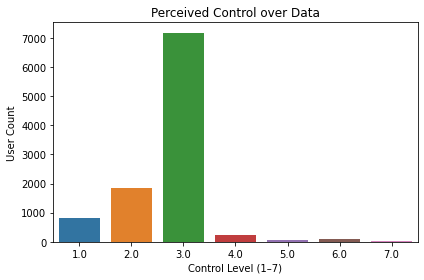

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the data is numeric
df['Data_Control_Level'] = pd.to_numeric(df['Data_Control_Level'], errors='coerce')

# Drop NA and sort numerically
sorted_levels = sorted(df['Data_Control_Level'].dropna().unique())

# Now plot
sns.countplot(x='Data_Control_Level', data=df, order=sorted_levels)
plt.title("Perceived Control over Data")
plt.xlabel("Control Level (1–7)")
plt.ylabel("User Count")
plt.tight_layout()
plt.show()

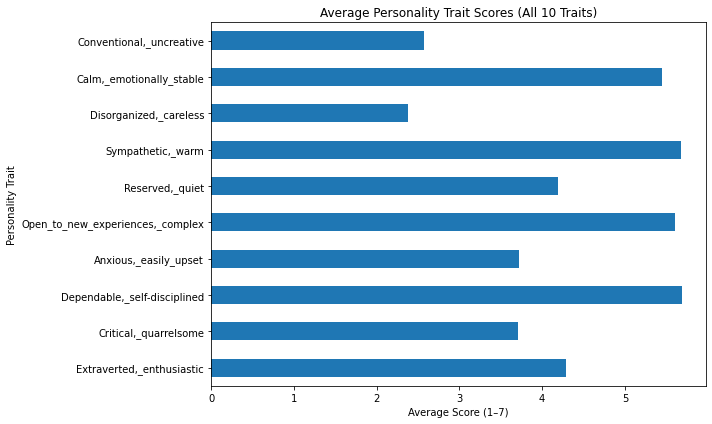

In [35]:
traits = [
    'Extraverted,_enthusiastic', 'Critical,_quarrelsome',
    'Dependable,_self-disciplined', 'Anxious,_easily_upset',
    'Open_to_new_experiences,_complex', 'Reserved,_quiet',
    'Sympathetic,_warm', 'Disorganized,_careless',
    'Calm,_emotionally_stable', 'Conventional,_uncreative'
]

# Convert values to numeric
df[traits] = df[traits].apply(pd.to_numeric, errors='coerce')
df.dropna(subset=traits, how='all', inplace=True)

# Plot
df[traits].mean().plot(kind='barh', figsize=(10, 6))
plt.title("Average Personality Trait Scores (All 10 Traits)")
plt.xlabel("Average Score (1–7)")
plt.ylabel("Personality Trait")
plt.tight_layout()
plt.show()

In [37]:
education_map = {
    1: 'Primary school',
    2: 'Secondary / High school',
    3: 'Diploma',
    4: 'Vocational training',
    5: 'Undergraduate degree',
    6: 'Master’s degree',
    7: 'Doctoral degree',
    8: 'Other (please specify)'
}

# Convert and map the education level
df['Education_Level'] = pd.to_numeric(df['Education_Level'], errors='coerce')
df['Education_Level_Label'] = df['Education_Level'].map(education_map)

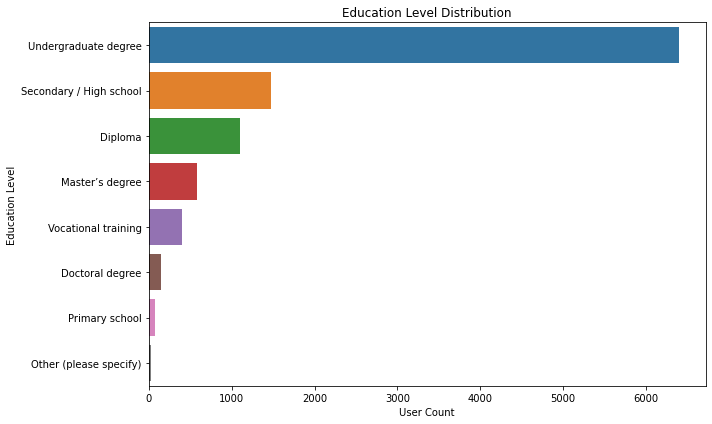

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Education_Level_Label', data=df, order=df['Education_Level_Label'].value_counts().index)
plt.title("Education Level Distribution")
plt.xlabel("User Count")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()

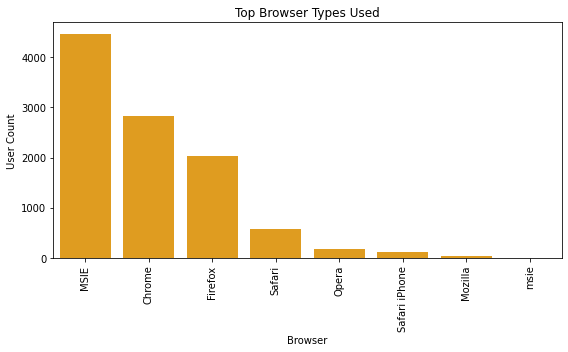

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Q1_1_TEXT', order=df['Q1_1_TEXT'].value_counts().index, color='orange')
plt.title("Top Browser Types Used")
plt.xlabel("Browser")
plt.ylabel("User Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

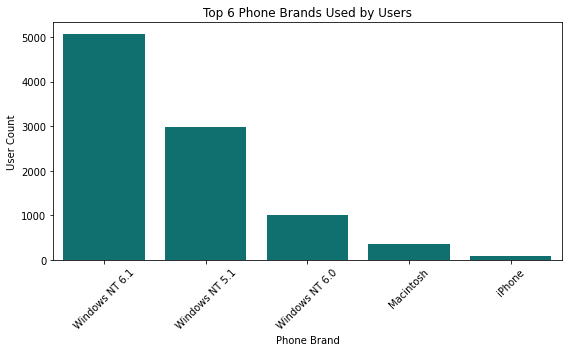

In [43]:
plt.figure(figsize=(8, 5))
top_brands = df['Q1_3_TEXT'].value_counts().nlargest()
sns.barplot(x=top_brands.index, y=top_brands.values, color='teal')
plt.title("Top 6 Phone Brands Used by Users")
plt.xlabel("Phone Brand")
plt.ylabel("User Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
occupation_map = {
    1: 'Management', 2: 'Business', 3: 'Math/CS', 4: 'Engineering',
    5: 'Science', 6: 'Community Service', 7: 'Legal', 8: 'Education',
    9: 'Arts/Media', 10: 'Healthcare', 11: 'Health Support', 12: 'Protective',
    13: 'Food Service', 14: 'Maintenance', 15: 'Personal Care', 16: 'Sales',
    17: 'Admin Support', 18: 'Farming', 19: 'Construction', 20: 'Repair',
    21: 'Production', 22: 'Transport', 23: 'Military', 24: 'Student', 25: 'Other'
}

In [47]:
# Convert occupation to numeric first if needed
df['Occupation'] = pd.to_numeric(df['Occupation'], errors='coerce')

# Map values
df['Occupation_Label'] = df['Occupation'].map(occupation_map)

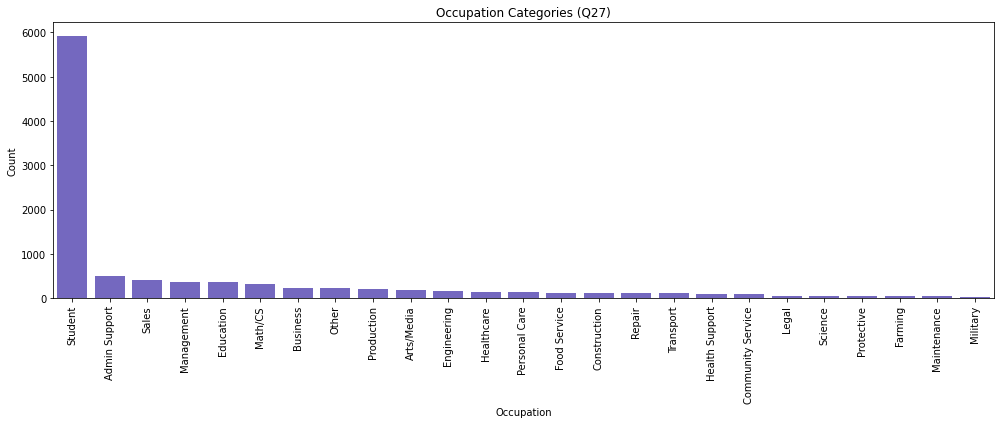

In [49]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Occupation_Label', order=df['Occupation_Label'].value_counts().index, color='slateblue')
plt.title("Occupation Categories (Q27)")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

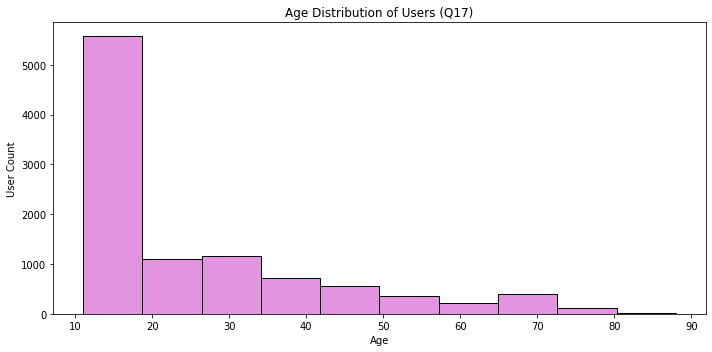

In [51]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=10, color='orchid', edgecolor='black')
plt.title("Age Distribution of Users (Q17)")
plt.xlabel("Age")
plt.ylabel("User Count")
plt.tight_layout()
plt.show()

In [53]:
nationality_map = {
    1: 'American', 2: 'Australian', 3: 'Brazillian', 4: 'British',
    5: 'Canadian', 6: 'Chinese', 7: 'French', 8: 'German', 9: 'Indian',
    10: 'Italian', 11: 'Japanese', 12: 'Mexican', 13: 'Russian',
    14: 'South Korean', 15: 'Spanish', 16: 'Other'
}

In [55]:
# Convert to numeric if needed
df['Nationality'] = pd.to_numeric(df['Nationality'], errors='coerce')

# Map values to readable labels
df['Nationality_Label'] = df['Nationality'].map(nationality_map)

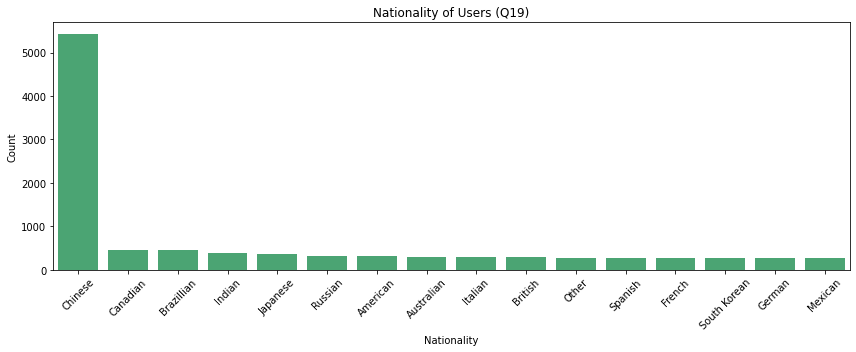

In [57]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Nationality_Label', order=df['Nationality_Label'].value_counts().index, color='mediumseagreen')
plt.title("Nationality of Users (Q19)")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

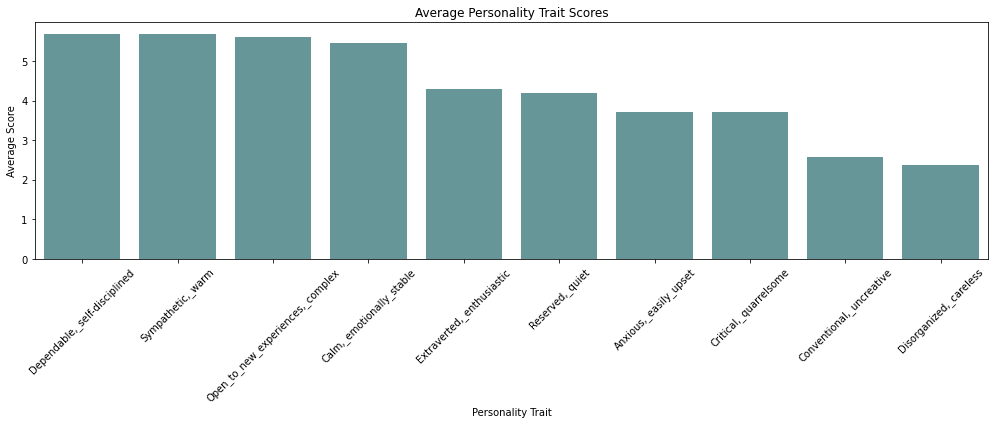

In [59]:
trait_columns = [
    'Extraverted,_enthusiastic', 'Critical,_quarrelsome',
    'Dependable,_self-disciplined', 'Anxious,_easily_upset',
    'Open_to_new_experiences,_complex', 'Reserved,_quiet',
    'Sympathetic,_warm', 'Disorganized,_careless',
    'Calm,_emotionally_stable', 'Conventional,_uncreative'
]

mean_traits = df[trait_columns].astype(float).mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=mean_traits.index, y=mean_traits.values, color='cadetblue')
plt.title("Average Personality Trait Scores")
plt.xlabel("Personality Trait")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

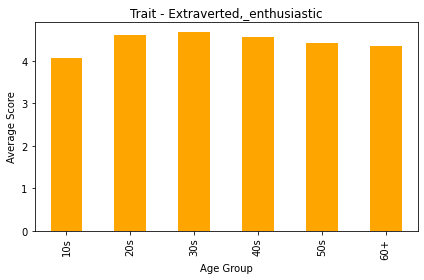

In [83]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Extraverted,_enthusiastic'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='orange')
plt.title('Trait - Extraverted,_enthusiastic')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

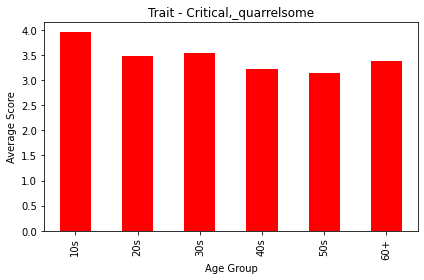

In [85]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Critical,_quarrelsome'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='red')
plt.title('Trait - Critical,_quarrelsome')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

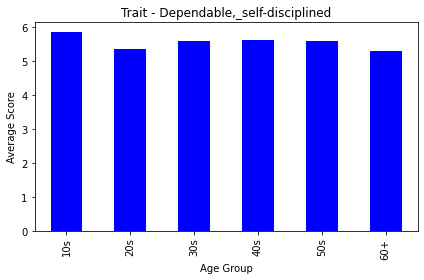

In [87]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Dependable,_self-disciplined'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='blue')
plt.title('Trait - Dependable,_self-disciplined')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

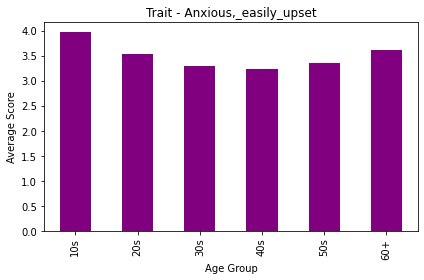

In [89]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Anxious,_easily_upset'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='purple')
plt.title('Trait - Anxious,_easily_upset')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

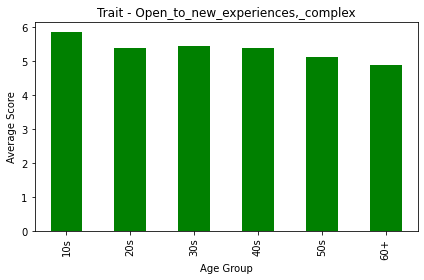

In [91]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Open_to_new_experiences,_complex'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='green')
plt.title('Trait - Open_to_new_experiences,_complex')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

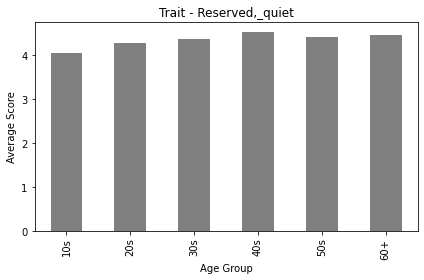

In [93]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Reserved,_quiet'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='gray')
plt.title('Trait - Reserved,_quiet')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

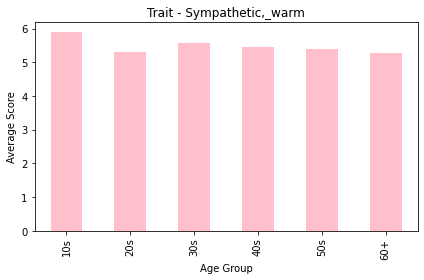

In [95]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Sympathetic,_warm'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='pink')
plt.title('Trait - Sympathetic,_warm')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

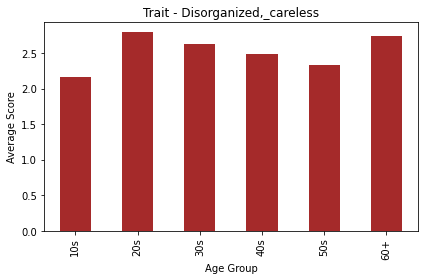

In [97]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Disorganized,_careless'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='brown')
plt.title('Trait - Disorganized,_careless')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

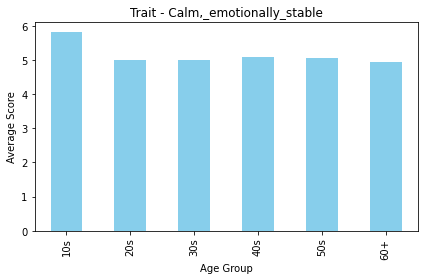

In [99]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Calm,_emotionally_stable'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='skyblue')
plt.title('Trait - Calm,_emotionally_stable')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

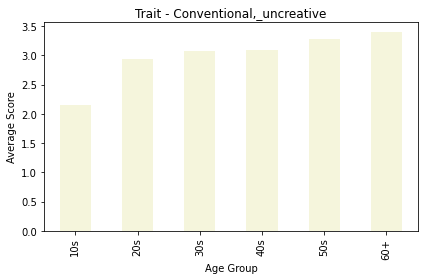

In [101]:
# Plot
# Create age groups
bins = [10, 20, 30, 40, 50, 60, 100]
labels = ['10s', '20s', '30s', '40s', '50s', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
trait_avg = df.groupby('AgeGroup')['Conventional,_uncreative'].mean()
plt.figure(figsize=(6, 4))
trait_avg.plot(kind='bar', color='beige')
plt.title('Trait - Conventional,_uncreative')
plt.xlabel('Age Group')
plt.ylabel('Average Score')
plt.tight_layout()
plt.show()

<Figure size 1152x576 with 0 Axes>

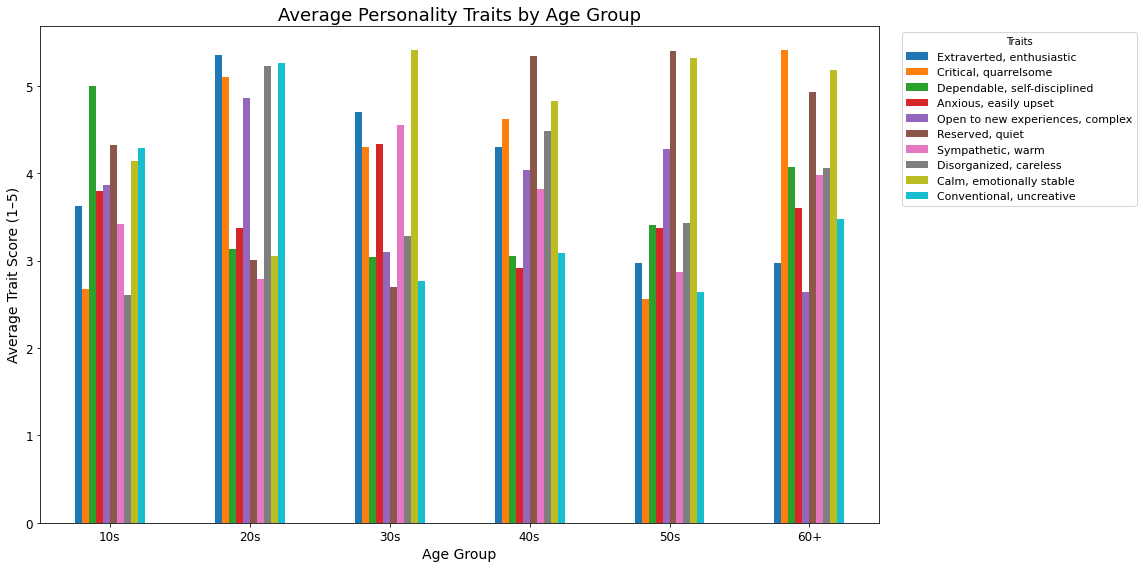

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define age groups and traits
age_groups = ['10s', '20s', '30s', '40s', '50s', '60+']
traits = [
    'Extraverted, enthusiastic', 'Critical, quarrelsome', 'Dependable, self-disciplined',
    'Anxious, easily upset', 'Open to new experiences, complex', 'Reserved, quiet',
    'Sympathetic, warm', 'Disorganized, careless', 'Calm, emotionally stable',
    'Conventional, uncreative'
]

# Generate example average scores
np.random.seed(42)
data = {trait: np.random.uniform(2.5, 5.5, size=len(age_groups)) for trait in traits}
data['Age Group'] = age_groups

# Create DataFrame and plot
df_traits = pd.DataFrame(data)
df_traits.set_index('Age Group', inplace=True)

plt.figure(figsize=(16, 8))
df_traits.plot(kind='bar', figsize=(16, 8), colormap='tab10')

plt.title("Average Personality Traits by Age Group", fontsize=18)
plt.ylabel("Average Trait Score (1–5)", fontsize=14)
plt.xlabel("Age Group", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Traits', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)
plt.tight_layout()
plt.show()

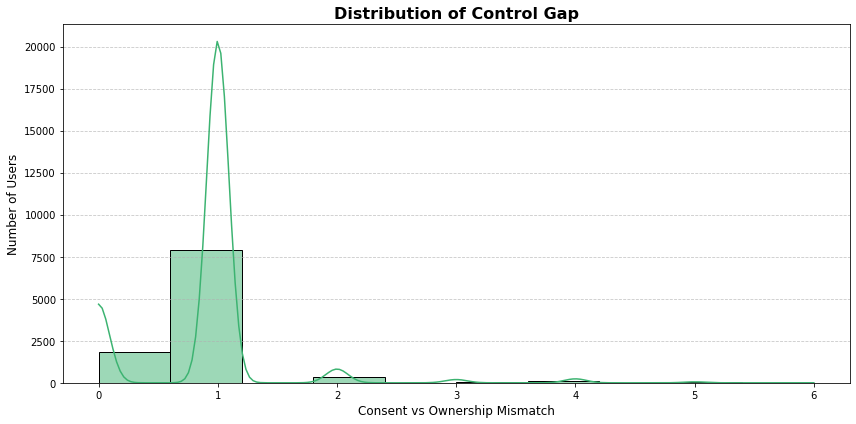

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Control_Gap' column is numeric
df['Control_Gap'] = pd.to_numeric(df['Control_Gap'], errors='coerce')
df = df.dropna(subset=['Control_Gap'])

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['Control_Gap'], bins=10, kde=True, color='mediumseagreen', edgecolor='black', alpha=0.5)
plt.title('Distribution of Control Gap', fontsize=16, weight='bold')
plt.xlabel('Consent vs Ownership Mismatch', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [110]:
df['Control_Gap'] = pd.to_numeric(df['Control_Gap'], errors='coerce')

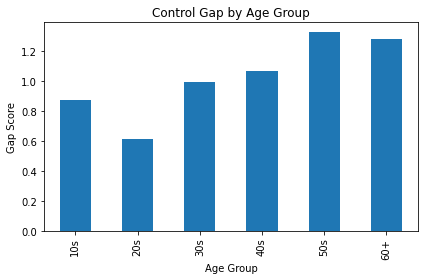

In [112]:
df.groupby('Age_Group')['Control_Gap'].mean().plot(kind='bar')
plt.title("Control Gap by Age Group")
plt.ylabel("Gap Score")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

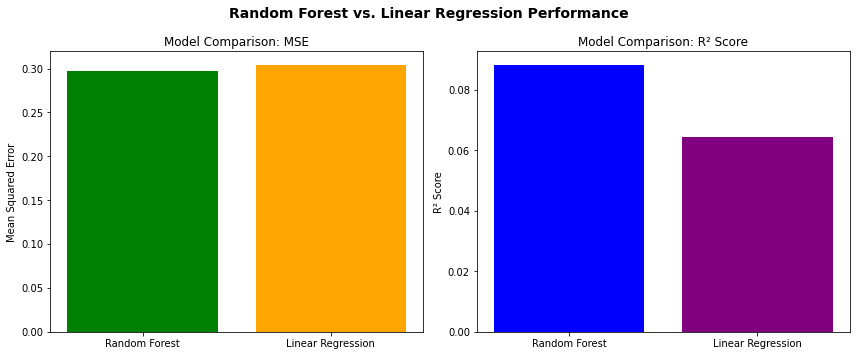

In [120]:
# Step 2: Train and compare models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# Train both models
rf_model = RandomForestRegressor(random_state=42)
lr_model = LinearRegression()
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Evaluation metrics
mse_values = [mean_squared_error(y_test, rf_preds), mean_squared_error(y_test, lr_preds)]
r2_values = [r2_score(y_test, rf_preds), r2_score(y_test, lr_preds)]
model_names = ['Random Forest', 'Linear Regression']

# Step 3: Plot comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].bar(model_names, mse_values, color=['green', 'orange'])
axs[0].set_title('Model Comparison: MSE')
axs[0].set_ylabel('Mean Squared Error')

axs[1].bar(model_names, r2_values, color=['blue', 'purple'])
axs[1].set_title('Model Comparison: R² Score')
axs[1].set_ylabel('R² Score')

plt.suptitle("Random Forest vs. Linear Regression Performance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

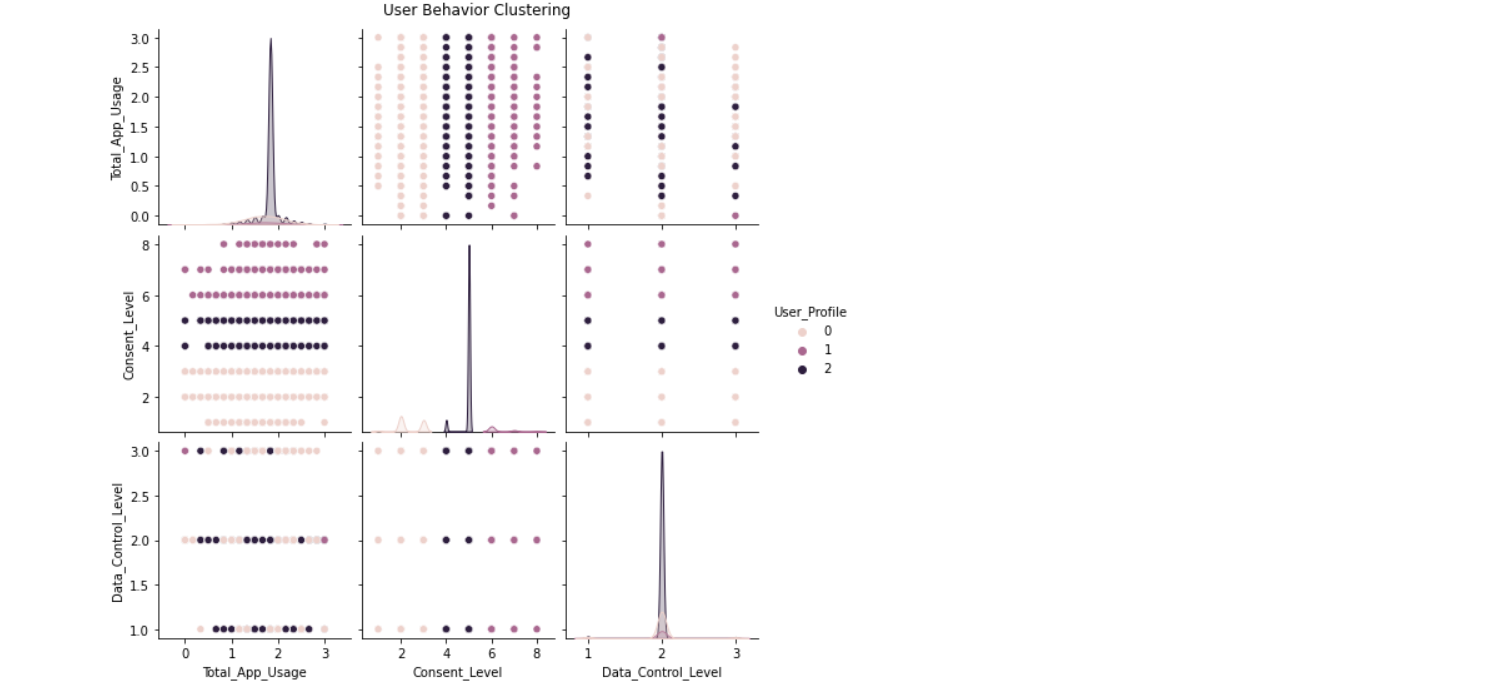

In [123]:
#Clustering for User Profiles

k_features = df[['Total_App_Usage', 'Consent_Level', 'Data_Control_Level']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['User_Profile'] = kmeans.fit_predict(k_features)

sns.pairplot(df, vars=k_features.columns, hue='User_Profile')
plt.suptitle("User Behavior Clustering", y=1.02)
plt.show()

In [164]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [168]:
# Convert target column to boolean: True = Low Control, False = High Control
df['Low_Control'] = df['Data_Control_Level'].apply(lambda x: True if str(x).lower().strip() in ['low', '1', 'yes'] else False)

# Select numeric or relevant predictors (e.g., app usage + personality traits)
features = [
    'Games', 'Social_Networking', 'Music', 'Utilities', 'Weather',
    'Photo_Video', 'Navigation', 'Entertainment', 'Books', 'News', 'Lifestyle',
    'Travel', 'Health_Fitness', 'Education', 'Productivity', 'Food_Drink',
    'Sports', 'Finance', 'Business', 'Reference', 'Medical', 'Catalogues', 'Other',
    'Dependable,_self-disciplined', 'Sympathetic,_warm', 'Open_to_new_experiences,_complex',
    'Calm,_emotionally_stable', 'Extraverted,_enthusiastic', 'Reserved,_quiet',
    'Anxious,_easily_upset', 'Critical,_quarrelsome', 'Conventional,_uncreative', 'Disorganized,_careless'
]

X = df[features].apply(pd.to_numeric, errors='coerce').fillna(0)
y = df['Low_Control']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [206]:
from sklearn.metrics import classification_report

# Safely generate the classification report with specified labels
report = classification_report(
    y_test, y_pred,
    labels=[False, True],
    target_names=['False', 'True'],
    output_dict=False,
    zero_division=0
)
print("Random Forest Classification Report")
print(report)

Random Forest Classification Report
               precision   recall    f1-score  support

False          0.235294    0.043478  0.073394  92.000000
True           0.932900    0.989490  0.960377  1237.000000

accuracy       0.924003    0.924003  0.924003  0.924003
macro avg      0.584110    0.516484  0.516886  1329.000000
weighted avg   0.884633    0.924003  0.898975  1329.000000


In [196]:
report_df = pd.DataFrame(
    classification_report(y_test, y_pred, labels=[False, True], target_names=['False', 'True'], output_dict=True)
).transpose()
report_df

Random Forest Classification Report


,precision,recall,f1-score,support
False,0.235294,0.043478,0.073394,92.000000
True,0.932900,0.989490,0.960377,1237.000000
accuracy,0.924003,0.924003,0.924003,0.924003
macro avg,0.584110,0.516484,0.516886,1329.000000
weighted avg,0.884633,0.924003,0.898975,1329.000000
